# Fashion Recommendation System Using Image Features



#### Introduction

In the fast-evolving world of e-commerce, personalized fashion recommendations enhance user experience by suggesting styles that align with individual preferences. This project aims to build a fashion recommendation system leveraging deep learning and image processing techniques. By using image features extracted from fashion items, the system will offer tailored recommendations, providing users with similar outfit options based on their choices. The model will be trained on a diverse dataset of fashion images, which includes various styles, colors, and categories, ensuring that recommendations are versatile and personalized. The dataset can be downloaded from [this link](https://statso.io/fashion-recommendations-using-image-features-case-study/).


In [3]:
import numpy as np
import os
import cv2

In [14]:
folder_path =  "C:/Users/zeyil/Desktop/data science/specialize in data/recommandation system with cv/women fashion/"

In [16]:
def preprocess_image(folder_path):
    images = []
    for filename in os.listdir(folder_path):
        img_path = os.path.join(folder_path, filename)
        img = cv2.imread(img_path)
        if img is not None:
            img = cv2.resize(img, (224, 224))
            img = img / 255.0
            images.append(img)
    return np.array(images)

In [18]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model

base_model = VGG16(weights= "imagenet" , include_top = False, input_shape= (224,224,3))
model = Model(inputs= base_model.input , outputs = base_model.get_layer("block5_pool").output)


In [20]:
preprcossed_img = preprocess_image(folder_path)
features= model.predict(preprcossed_img)
features= features.reshape(features.shape[0],-1)  # to 2D


3/3 ━━━━━━━━━━━━━━━━━━━━ 8s 2s/step


In [22]:
import matplotlib.pyplot as plt

def show_similar_images(folder_path, target_index, similar_indices):
    # Klasördeki dosyaları al
    image_files = os.listdir(folder_path)

    # Hedef resmi oku ve kontrol et
    target_image_path = os.path.join(folder_path, image_files[target_index])
    target_image = cv2.imread(target_image_path)

    if target_image is None:
        print(f"Hedef resim okunamadı: {target_image_path}")
        return

    target_image = cv2.cvtColor(target_image, cv2.COLOR_BGR2RGB)  # OpenCV BGR formatını RGB'ye dönüştür
    
    plt.figure(figsize=(15, 5))
    plt.subplot(1, 6, 1)  # 1 satır, 6 sütun, 1. pozisyonda hedef resmi göster
    plt.imshow(target_image)
    plt.title("Target Image")
    plt.axis('off')
    
    # Benzer resimleri göster
    for i, index in enumerate(similar_indices):
        similar_image_path = os.path.join(folder_path, image_files[index])
        similar_image = cv2.imread(similar_image_path)
        
        if similar_image is not None:
            similar_image = cv2.cvtColor(similar_image, cv2.COLOR_BGR2RGB)
            plt.subplot(1, 6, i+2)  # 1 satır, 6 sütun, 2'den 6'ya kadar pozisyonlarda göster
            plt.imshow(similar_image)
            plt.title(f"Similar {i+1}")
            plt.axis('off')
        else:
            print(f"Benzer resim okunamadı: {similar_image_path}")
    
    plt.show()


show_similar_images(folder_path, target_index, similar_images_indices)


Hedef resim okunamadı: C:/Users/zeyil/Desktop/data science/specialize in data/recommandation system with cv/women fashion/.ipynb_checkpoints


index of most similarity img: [45 81 72 84 83]
similarities values: [0.9918253  0.8268548  0.80775046 0.8022512  0.80063754]


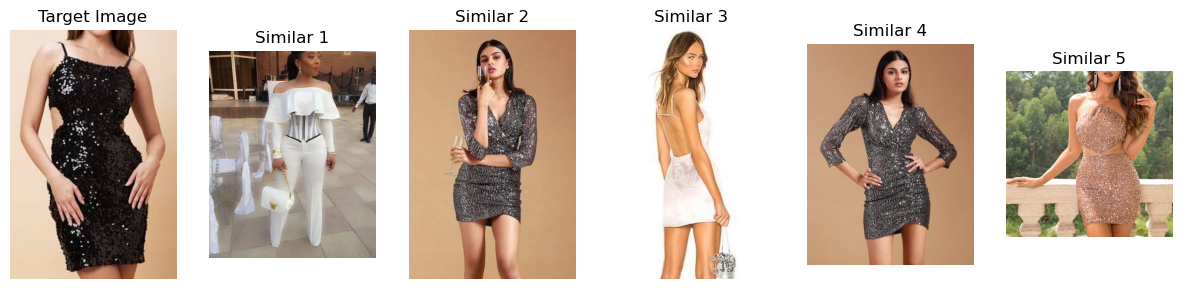

In [38]:

target_index = 18

from sklearn.metrics.pairwise import cosine_similarity

target_feature = features[target_index].reshape(1, -1) 
similarities = cosine_similarity(target_feature, features)[0]  
similar_images_indices = np.argsort(similarities)[::-1][1:6]  
print("index of most similarity img:", similar_images_indices)
print("similarities values:", similarities[similar_images_indices])


# Benzer resimleri göster
show_similar_images(folder_path, target_index, similar_images_indices)


## Conclusion

This project focused on detecting similar images using image processing and machine learning techniques. Below is a summary of the main techniques and approaches utilized throughout the project:

1. **Feature Extraction**: The VGG16 model was used to extract features from the images. This model is a convolutional neural network based on deep learning and is widely used for image classification tasks. As a pretrained model, it effectively learns complex structural features of the images.

2. **Cosine Similarity**: Cosine similarity was employed as the similarity measurement method. This approach measures the angle between two vectors to determine how similar they are. Similarities between the feature vectors of the images were calculated in this manner.

3. **Image Visualization**: The `matplotlib` library was used to visualize the target image and similar images. This allows users to evaluate the similarities visually, facilitating a better understanding of the results.

4. **Error Checking and Management**: The project included error management that checks whether images were successfully read. This way, informative messages are provided to the user when issues such as file path errors and empty images are encountered.

This project demonstrates how deep learning techniques can be integrated into real-world problems. In the future, further research can be conducted on similarity measurement methods and deep learning architectures to enhance the model's performance.
